In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv('HR_Works.csv')

In [7]:
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [8]:
data.tail(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


## Data Exploration and Visulisation 

In [10]:
workers_left = data[data.left == 1]
workers_left.shape

(3571, 10)

In [11]:
workers_retained = data[data.left == 0]
workers_retained.shape

(11428, 10)

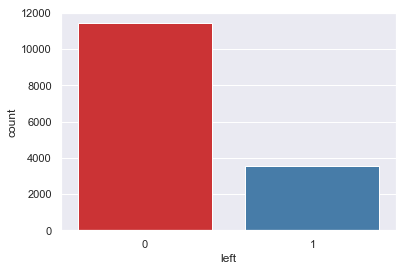

In [18]:
#Lets check our retained workers vs those that left on a histogram 
sns.countplot(data['left'], palette="Set1" )

In [19]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


     From the above we see that those with lower satisfaction level left the company while those who have high satisfaction with job stayed back 

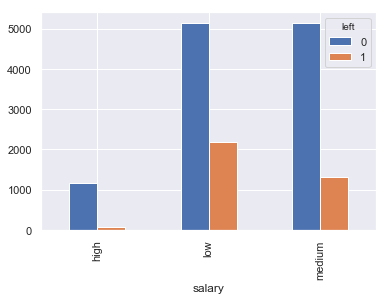

In [34]:
#Viewing the relationship bar chat of the salaries to those that left or stayed 


pd.crosstab(data.salary,data.left).plot.bar()

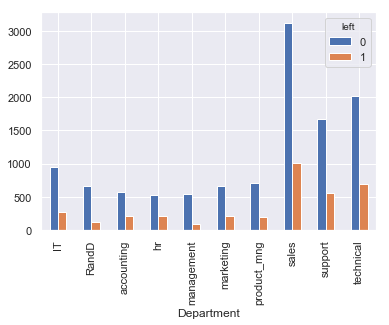

In [37]:
## The Department doesn't have much impact on the reason they left or stayed 

pd.crosstab(data.Department,data.left).plot.bar()

# So we have to use the relevant columns which  are 
    1) Satisfaction Level 
    2) Promotion last 5 years 
    3) Average monthly hours 
    4) Salary 
    5) Time Spent in the company 

In [38]:
new_data = data[['satisfaction_level','average_montly_hours','number_project','time_spend_company','salary','promotion_last_5years']]

In [39]:
new_data.head()

,satisfaction_level,average_montly_hours,number_project,time_spend_company,salary,promotion_last_5years
0,0.38,157,2,3,low,0
1,0.80,262,5,6,medium,0
2,0.11,272,7,4,medium,0
3,0.72,223,5,5,low,0
4,0.37,159,2,3,low,0


In [42]:
#The Salary would be turned to dummy variables. 

salary_dummy = pd.get_dummies(new_data.salary, prefix = "salary")

In [43]:
salary_dummy.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [45]:
# Time at concat it with our dataframe

new_data_Dum = pd.concat([new_data, salary_dummy], axis = 'columns' )

In [50]:
new_data_Dum = new_data_Dum.drop('salary', axis = 'columns')
new_data_Dum.head()

,satisfaction_level,average_montly_hours,number_project,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,2,3,0,0,1,0
1,0.80,262,5,6,0,0,0,1
2,0.11,272,7,4,0,0,0,1
3,0.72,223,5,5,0,0,1,0
4,0.37,159,2,3,0,0,1,0


In [53]:
#Lets place our data into the X and Y variables so we can Train and test them easily 

y = data['left'] 

In [54]:
X = new_data_Dum

## Time To train our model 

In [55]:
#Lets Split Our data 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [57]:
X_train.shape

(11999, 8)

In [58]:
X_test.shape

(3000, 8)

## I will be using both LOgistic Regression and Random Forest to train my model 

In [65]:
#For Logistic Regression :

LR_model = LogisticRegression(solver='lbfgs', max_iter=200)

In [66]:
LR_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
#Lets check our model acuracy: 

LR_model.score(X_test, y_test)

0.7676666666666667

## For Random Forest 

In [74]:
# Using Random Forest

RM_model = RandomForestClassifier(n_estimators=100)

In [75]:
RM_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [76]:
RM_model.score(X_test, y_test)

0.984

# Using Confusion Matrix to see how our model did 

In [78]:
y_predicted = RM_model.predict(X_test)

from sklearn.metrics import confusion_matrix

In [79]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2259,    7],
       [  41,  693]], dtype=int64)

Text(66.5, 0.5, 'Truth')

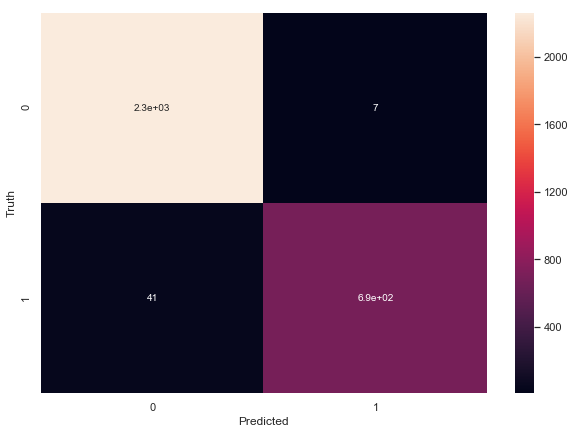

In [84]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')